# Distances and entropies

Mostly compute the result of table 2.

In [1]:
# Experiment selection : 
exp="exp3"

In [2]:
from __future__ import division, print_function
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, Math, Latex
from math import log, sqrt
import editdistance
import random


filepairsab = "../Datas/"+exp+"/pairs_ab.tsv.gz"
filepairsaa = "../Datas/"+exp+"/pairs_aa.tsv.gz"
filepairsbb = "../Datas/"+exp+"/pairs_bb.tsv.gz"

def KL_distance(v1, v2):
    d1 = v1.value_counts()/len(v1)
    d2 = v2.value_counts()/len(v2)
    df = pd.concat([d1, d2], axis=1, keys=["a", "b"], sort=True)
    df = df.dropna(how="any")
    df["divergence"] = df.apply(lambda s: s.a*log(s.a/s.b,2), axis=1)
    return np.sum(df.divergence)

In [3]:
dfaa = pd.read_csv(filepairsaa, sep="\t")
dfab = pd.read_csv(filepairsab, sep="\t")
dfbb = pd.read_csv(filepairsbb, sep="\t")

In [4]:
def bootstrapping_std_error(df, serie):
    s = []
    for i in range(50):
        s.append(np.std(df.sample(frac=1, replace=True)[serie]))
    return np.std(s)

In [5]:
def properties_distribution(dfxx):
    print("Length:")
    print("Mean:")
    print("Non-coding, paired", np.mean(dfxx[dfxx.status_1 == "Out"].cdr3Length_1))
    print("Functional", np.mean(dfxx[dfxx.status_2 == "Out"].cdr3Length_1))
    print("coding, paired", np.mean(dfxx[dfxx.status_1 == "In"].cdr3Length_1))
    print("\nStandard deviation: ")
    print("Non-coding, paired", np.std(dfxx[dfxx.status_1 == "Out"].cdr3Length_1), 
          ", error:", bootstrapping_std_error(dfxx[dfxx.status_1 == "Out"], "cdr3Length_1"))
    print("Functional", np.std(dfxx[dfxx.status_2 == "Out"].cdr3Length_1),
          ", error:", bootstrapping_std_error(dfxx[dfxx.status_2 == "Out"], "cdr3Length_1"))
    print("coding", np.std(dfxx[dfxx.status_1 == "In"].cdr3Length_1),
          ", error:", bootstrapping_std_error(dfxx[dfxx.status_1 == "In"], "cdr3Length_1"))

    df_funct = dfxx[dfxx.status_2 == "Out"]
    df_noncoding = dfxx[dfxx.status_1 == "Out"]
    df_coding = dfxx[dfxx.status_1 == "In"]

    print("\n\nKL divergence:")
    print("\nV :")
    print("Functional | Non-coding :",KL_distance(df_funct.vname_1, df_noncoding.vname_1))
    print("Functional | Coding :",KL_distance(df_funct.vname_1, df_coding.vname_1))
    print("Coding | Non-coding :",KL_distance(df_coding.vname_1, df_noncoding.vname_1))
    print("\nJ :")
    print("Functional | Non-coding :",KL_distance(df_funct.jname_1, df_noncoding.jname_1))
    print("Functional | Coding :",KL_distance(df_funct.jname_1, df_coding.jname_1))
    print("Coding | Non-coding :",KL_distance(df_noncoding.jname_1, df_coding.jname_1))
    
    f, ax = plt.subplots(figsize=(10,6))

    vFunc = dfxx[dfxx.status_1 == "Out"].cdr3Length_2.value_counts()
    # print(vFunc)
    vFuncval = vFunc.values/sum(vFunc)
    vFunckey = vFunc.keys()

    vOut = dfxx[dfxx.status_1 == "Out"].cdr3Length_1.value_counts()
    vOutval = vOut.values/sum(vOut)
    vOutkey = vOut.keys()

    plt.style.use('seaborn')
    ax.bar(vFunckey, vFuncval, alpha=1, color="xkcd:electric blue", label="Functional")
    ax.bar(vOutkey, vOutval, alpha=1, color="xkcd:purple", label="Out-of-frame (paired)")
    ax.set(xlabel="Length of CDR3", ylabel="", xlim=(10,70))
    ax.legend()
    ax.grid(visible=False)
    plt.savefig("cdr3_length_a.pdf")
    plt.show()

### Betas sequences

Length:
Mean:
Non-coding, paired 43.34307585247043
Functional 43.617063492063494
coding, paired 42.131028997035216

Standard deviation: 
Non-coding, paired 7.876122650522693 , error: 0.18236679724323626
Functional 5.073486413975518 , error: 0.10323132000784893
coding 5.556437899420442 , error: 0.04806778644063823


KL divergence:

V :
Functional | Non-coding : 0.9588285961682098
Functional | Coding : 0.5251338622978046
Coding | Non-coding : 0.7781032589912633

J :
Functional | Non-coding : 0.11280310982559512
Functional | Coding : 0.07468228540253329
Coding | Non-coding : 0.0654362822938486


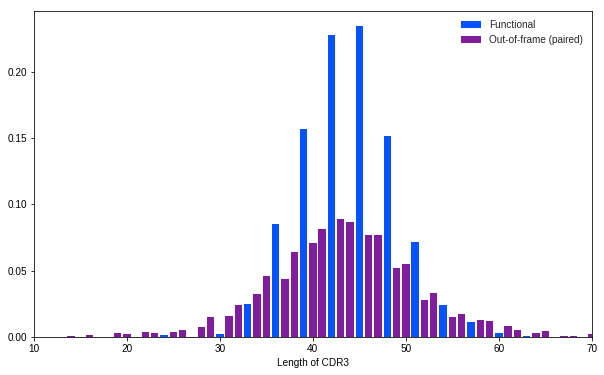

In [6]:
properties_distribution(dfbb)

### Alphas sequences

Length:
Mean:
Non-coding, paired 38.47985989492119
Functional 40.07007851119511
coding, paired 37.40671429892101

Standard deviation: 
Non-coding, paired 7.928618538202512 , error: 0.06273274397789187
Functional 6.362786890681333 , error: 0.06861242599530228
coding 6.021776699194649 , error: 0.018791985706950093


KL divergence:

V :
Functional | Non-coding : 0.6859103651314304
Functional | Coding : 0.31447226110126925
Coding | Non-coding : 1.3922811905506074

J :
Functional | Non-coding : 0.11265447720219769
Functional | Coding : 0.0847956431235837
Coding | Non-coding : 0.11970944683196513


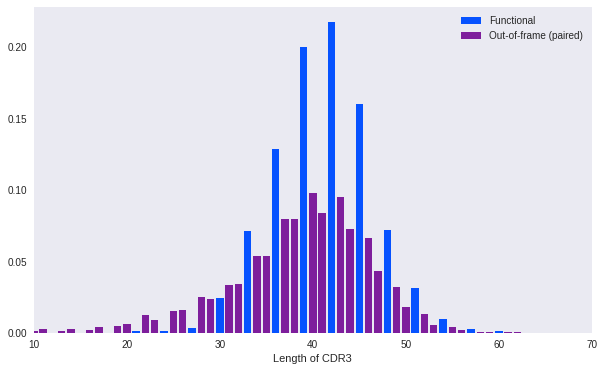

In [7]:
properties_distribution(dfaa)